## Hypothesis 1: The Value of Style

### Hypothesis: Artworks from certain styles consistently fetch higher average sale prices than works from other movements.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df_top_styles_avg = pd.read_csv('avg_sale_price_per_style.csv')

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_92518/1471234860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_styles_avg, y='style', x='avg_sale_price', palette='viridis', orient='h')


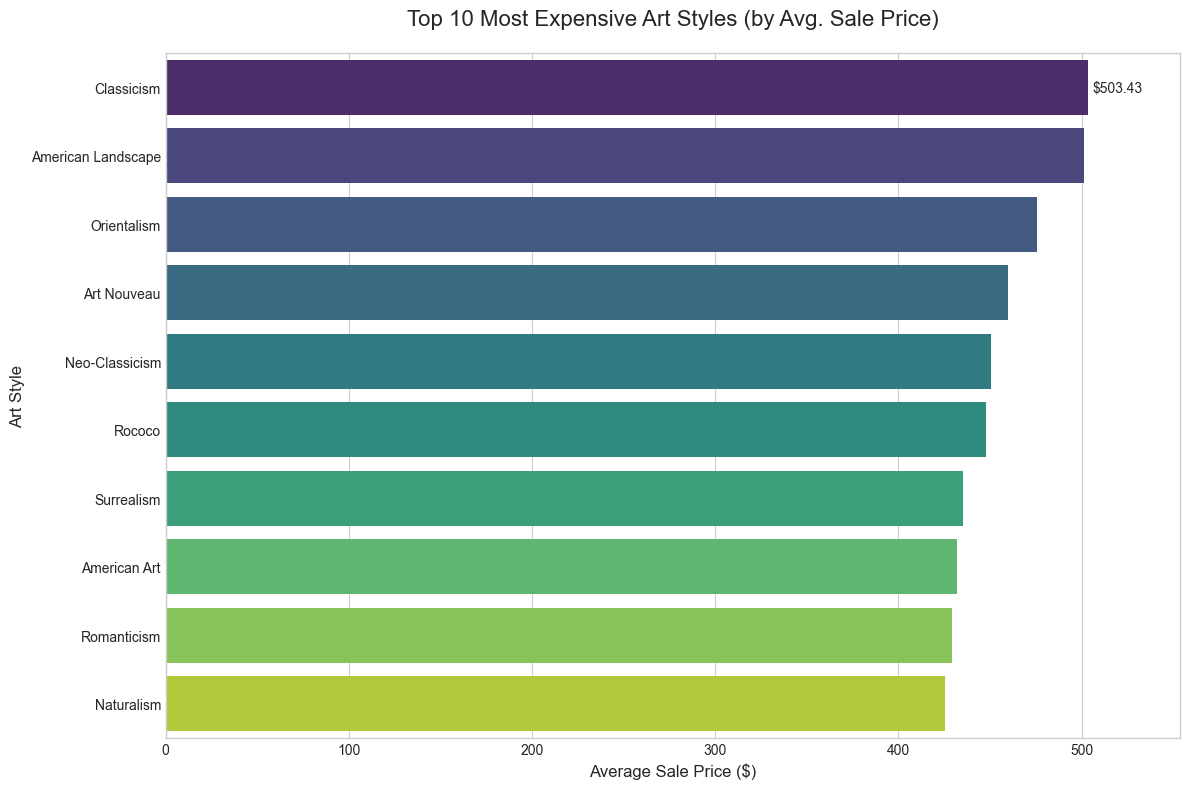

In [12]:
# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar plot
sns.barplot(data=df_top_styles_avg, y='style', x='avg_sale_price', palette='viridis', orient='h')

# Add titles and labels
ax.set_title('Top 10 Most Expensive Art Styles (by Avg. Sale Price)', fontsize=16, pad=20)
ax.set_xlabel('Average Sale Price ($)', fontsize=12)
ax.set_ylabel('Art Style', fontsize=12)

# Add data labels to the bars
ax.bar_label(ax.containers[0], fmt='$%.2f', padding=3)

# Adjust plot limits to give space for labels
ax.set_xlim(0, df_top_styles_avg['avg_sale_price'].max() * 1.1)

plt.tight_layout()
plt.show()


## Outcome: 

### There is a clear relationship between style and average sale price.

## Hypothesis 1a: Average vs Median

### Hypothesis: The average sale price per style might be skewed by a few high-priced outliers.

In [10]:
df_top_styles_median = pd.read_csv('median_sale_price_per_style.csv')

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_92518/3112635705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_styles_median, y='style', x='median_sale_price', palette='viridis', orient='h')


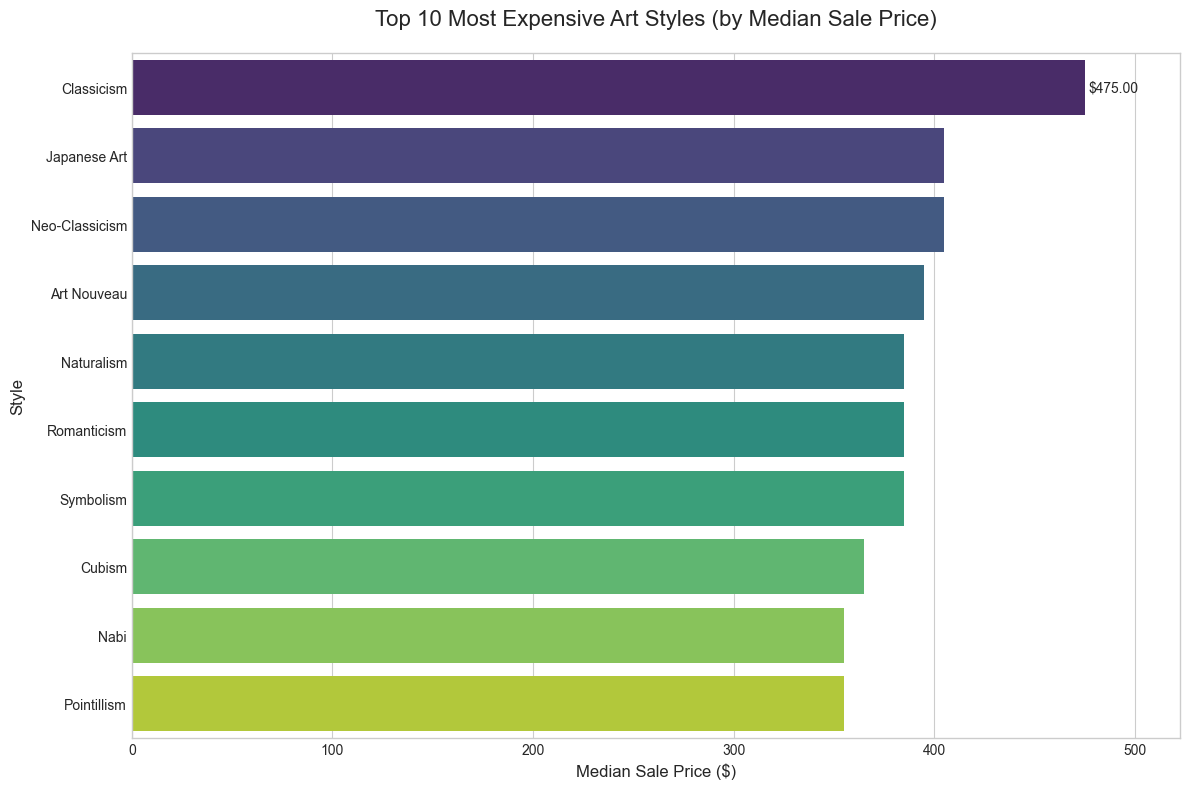

In [ ]:


# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar plot
sns.barplot(data=df_top_styles_median, y='style', x='median_sale_price', palette='viridis', orient='h')

# Add titles and labels
ax.set_title('Top 10 Most Expensive Art Styles (by Median Sale Price)', fontsize=16, pad=20)
ax.set_xlabel('Median Sale Price ($)', fontsize=12)
ax.set_ylabel('Art Style', fontsize=12)

# Add data labels to the bars
ax.bar_label(ax.containers[0], fmt='$%.2f', padding=3)

# Adjust plot limits to give space for labels
ax.set_xlim(0, df_top_styles_median['median_sale_price'].max() * 1.1)

plt.tight_layout()
plt.show()


## Outcome:

### American Landscape, Orientalism, Rococo, Surrealism, American Art, Naturalism don't appear, suggesting they had outliers that sold for higher than the median.